The workflow of the programme depends on what input is available.

![image](Workflow/Slide1.png)
![image](Workflow/Slide2.png)
![image](Workflow/Slide3.png)

In the following example, the full 4-step workflow will be illustrated.

# Case study:

Diversifying accross 4 asset classes:

1. Global equities
2. Inflation-protected securities
3. Commodities
4. Government bonds


In this simple example, the following 4 ETFs will be selected as proxies:

1. iShares MSCI ACWI ETF ([**ACWI**](https://www.ishares.com/us/products/239600/ishares-msci-acwi-etf) -> Global equities
2. iShares TIPS Bond ETF [(**TIP**)](https://www.ishares.com/us/products/239467/ishares-tips-bond-etf) -> Inflation-protected securities
3. iShares S&P GSCI Commodity-Indexed Trust [(**GSG**)](https://www.ishares.com/us/products/239757/ishares-sp-gsci-commodityindexed-trust-fund) -> Commodities
4. iShares Intermediate Govt/Crdt Bd ETF [(**GVI**)](https://www.ishares.com/us/products/239464/ishares-intermediate-governmentcredit-bond-etf) -> Government bonds

## Step 1. Data importing
Run setup file to get the necessary libraries.

In [1]:
%run -i setup

Import api_key from your secret file, and import the Risk Parity programmes from AssetAllocation python file.

In [2]:
from secret import api_key as api_key
from AssetAllocation import RiskParity, NonConvexRP, PrepDataRP, api_data

Specify the assets to get data online.

In [3]:
assets = ['ACWI', 'TIP', 'GSG', 'GVI']

Initiate an instance of the api_data class and run the prep_data() method.

In [4]:
data = api_data(api_key, assets, '2010.08.30', '2020.08.30', '1mo')
outcome_df = data.prep_data()

## Step 2. Preprocessing data
Initiate an instance of the preprocessor PrepDataRP() and turn the data into a return covariance matrix

In [5]:
preprocessing = PrepDataRP()
cov_mat = preprocessing.transform(outcome_df)
assets = preprocessing.assets_

## Step 3. Optimization
Run the preprocessed data through the core optimization class.

In [8]:
test_rpp = RiskParity(cov_mat, assets)
test_rpp.optimize()

Minimised convex risk function value: -2.3463


C:\Users\Viet Hung Ha\Documents\Python\Risk Parity\AssetAllocation.py:62: RuntimeWarning: invalid value encountered in log
  risk_func = 0.5*x_T.dot(self.cov_mat).dot(x) - b_T*(np.sum(np.log(x)))


,Assets,Allocation
0,ACWI,0.0907
1,TIP,0.2556
2,GSG,0.0696
3,GVI,0.5840


## Step 4. Output

Display and visualise risk statistics; Output an Excel file

Marginal risk contribution of assets:
 [0.02805182259096939, 0.0099437515929358, 0.03651706444738519, 0.004356879473644402]
Risk contribution of assets:
 [0.0025452429803408177, 0.0025419080476428817, 0.002543377181006525, 0.0025443684480833477]
Relative risk contribution of assets:
 [0.2501492709089451, 0.24982151006671413, 0.24996589810456432, 0.2500633209197763]


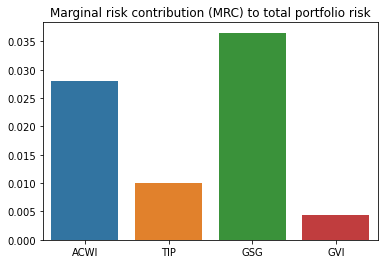

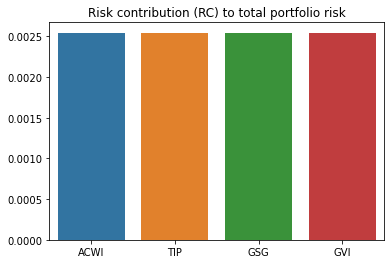

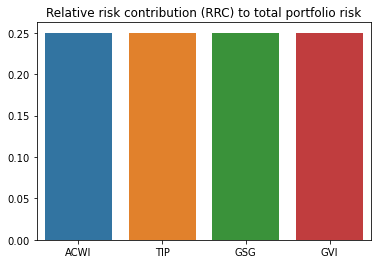

In [19]:
# Calculate and display relevant risk statistics
test_rpp.cal_risk_stats()
print(f'Marginal risk contribution of assets:\n {test_rpp.MRC_}')
print(f'Risk contribution of assets:\n {test_rpp.RC_}')
print(f'Relative risk contribution of assets:\n {test_rpp.RRC_}')

# Visualise risk statistics with graph
test_rpp.visualise_risk_stats()

# Output the allocation into an Excel file
test_rpp.out_excel()

## Comments
As can be seen from the asset allocation DataFrame:
The following allocation results in a Risk Parity portfolio of these 4 assets:

1. **ACWI**: 9%
2. **TIP**: 26%
3. **GSG**: 7%
4. **GVI**: 58%